Transferlearning: Training auf 100 Graphen mit je 100 Generationen
Vergleichswert: Training eines Graphen über 200 Generationen
Mean out of 10 TL Runs

In [1]:
import csv
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def avg(list):
    return round(sum(list)/len(list), 2)

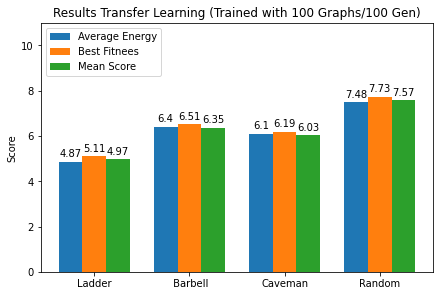

In [4]:
# Average Energy
avg_random = [7.37, 7.65, 7.3, 7.69, 7.43, 7.63, 7.54, 7.16, 7.44, 7.56]
avg_ladder = [4.88, 4.88, 5.03, 4.63, 5.13, 4.75, 4.77, 4.65, 4.85, 5.1]
avg_barbell = [6.44, 6.46, 6.64, 6.43, 6.63, 6.24, 6.35, 6.44, 5.99, 6.41]
avg_caveman = [5.94, 6.17, 6.04, 6.14, 6.32, 6.34, 6.01, 5.89, 5.89, 6.27]

# BestFitness
fit_random = [7.724, 7.747999999999999, 7.742999999999999, 7.721, 7.716, 7.752, 7.723000000000001, 7.707000000000001, 7.7090000000000005, 7.76]
fit_ladder = [5.125000000000001, 5.1000000000000005, 5.184, 5.107, 5.121, 5.1160000000000005, 5.072000000000001, 5.1, 5.1, 5.1240000000000006 ]
fit_barbell = [6.5040000000000004, 6.516, 6.5009999999999994, 6.506999999999999, 6.494, 6.514, 6.522, 6.491, 6.548000000000001, 6.515000000000001]
fit_caveman = [6.154, 6.180000000000001, 6.150000000000001, 6.232000000000001, 6.173000000000001, 6.163000000000001, 6.2090000000000005, 6.265999999999999, 6.186000000000001, 6.153]

# MeanScore
sco_random = [7.565815, 7.5728800000000005, 7.564500000000001, 7.57188, 7.57202, 7.572139999999999, 7.5709550000000005, 7.571330000000001, 7.568235, 7.5761400000000005]
sco_ladder = [4.97044, 4.97173, 4.97805, 4.96585, 4.97668, 4.973450000000001, 4.961825000000001, 4.972385, 4.972925, 4.96605]
sco_barbell = [6.35625, 6.35154, 6.35387, 6.34888, 6.353505, 6.345210000000001, 6.362194999999999, 6.359475, 6.34525, 6.350840000000001]
sco_caveman = [6.025519999999999, 6.032235000000001, 6.034115000000001, 6.031665, 6.02915, 6.03275, 6.02989, 6.0391200000000005, 6.035934999999999, 6.0293399999999995]

graphs = ("Ladder", " Barbell", "Caveman", "Random")
values = {
    'Average Energy': (avg(avg_ladder), avg(avg_barbell), avg(avg_caveman), avg(avg_random)),
    'Best Fitnees': (avg(fit_ladder), avg(fit_barbell), avg(fit_caveman), avg(fit_random)),
    'Mean Score': (avg(sco_ladder), avg(sco_barbell), avg(sco_caveman), avg(sco_random))
}

x = np.arange(len(graphs))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained')

for attribute, measurement in values.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_title('Results Transfer Learning (Trained with 100 Graphs/100 Gen)')
ax.set_xticks(x + width, graphs)
ax.legend(loc='upper left')
ax.set_ylim(0, 11)

plt.savefig('Transfer Learning.svg', format='svg', dpi = 1200)


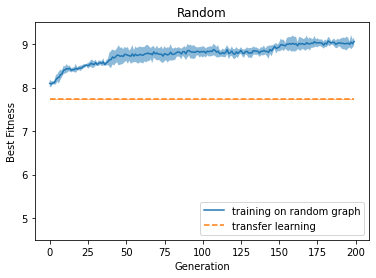

In [5]:
#### Random Best Fitness

with open('RandomTestBestFitness.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1BestFitness.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2BestFitness.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3BestFitness.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()

fitrandomtl = []

for i in range(200):
    fitrandomtl.append(avg(fit_random))
    
avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLu = []
stdTLl = []

for i in range(200):
    temp1 = avg(fit_random) + np.std(fit_random)
    temp2 = avg(fit_random) - np.std(fit_random)
    stdTLu.append(temp1)
    stdTLl.append(temp2)
    
plt.figure()

plt.plot(mean_value_energy, label='training on random graph')
plt.plot(fitrandomtl, label='transfer learning', linestyle='--')
plt.legend(loc = 'lower right')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('RBFTL.svg', format='svg', dpi = 1200)

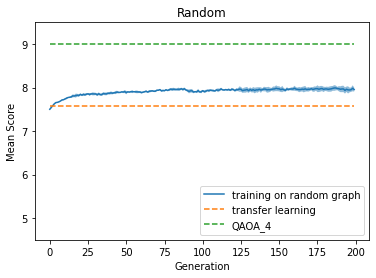

In [20]:
#### Random Mean Score


with open('RandomTestMeanScore.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1MeanScore.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2MeanScore.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3MeanScore.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()

scorandomtl = []
for i in range(200):
    scorandomtl.append(avg(sco_random))

randomQAOA4 = []
for i in range (200):
    randomQAOA4.append(9.00)    

avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLu = []
stdTLl = []

for i in range(200):
    temp1 = avg(sco_random) + np.std(sco_random)
    temp2 = avg(sco_random) - np.std(sco_random)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on random graph')
plt.plot(scorandomtl, label='transfer learning', linestyle='--')
plt.plot(randomQAOA4, label='QAOA_4', linestyle='--')
plt.legend(loc = 'lower right')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Mean Score")

plt.savefig('RMSTL.svg', format='svg', dpi = 1200)

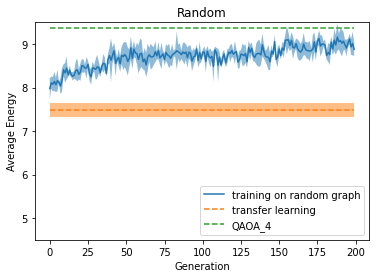

In [18]:
#### Random Average Energy

with open('RandomTestAverageEnergy.csv') as random1: 
    energyrandom1 = random1.readline()

with open('RandomTest1AverageEnergy.csv') as randomtest1: 
    energyrandomtest1 = randomtest1.readline()

with open('RandomTest2AverageEnergy.csv') as randomtest2: 
    energyrandomtest2 = randomtest2.readline()

with open('RandomTest3AverageEnergy.csv') as randomtest3: 
    energyrandomtest3 = randomtest3.readline()


randomtl = []
for i in range(200):
    randomtl.append(avg(avg_random))

randomQAOA4 = []
for i in range(200):
    randomQAOA4.append(9.37)    

avg_en1 = energyrandom1.split(',')
avg_en2 = energyrandomtest1.split(',')
avg_en3 = energyrandomtest2.split(',')
avg_en4 = energyrandomtest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []
for i in range(200):
    temp1 = avg(avg_random) + np.std(avg_random)
    temp2 = avg(avg_random) - np.std(avg_random)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on random graph')
plt.plot(randomtl, label='transfer learning', linestyle='--')
plt.plot(randomQAOA4, label='QAOA_4', linestyle='--')
plt.legend(loc = 'lower right')
plt.title('Random')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('RAETL.svg', format='svg', dpi = 1200)

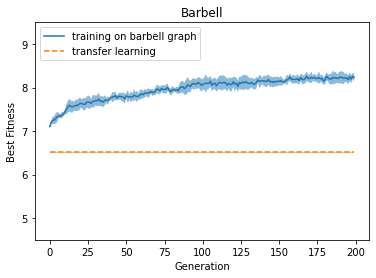

In [8]:
with open('BarbellTestBestFitness.csv') as barbell1: 
    energybarbell1 = barbell1.readline()

with open('BarbellTest1BestFitness.csv') as barbelltest1: 
    energybarbelltest1 = barbelltest1.readline()

with open('BarbellTest2BestFitness.csv') as barbelltest2: 
    energybarbelltest2 = barbelltest2.readline()

with open('BarbellTest3BestFitness.csv') as barbelltest3: 
    energybarbelltest3 = barbelltest3.readline()
    

barbelltl = []
for i in range(200):
    barbelltl.append(avg(fit_barbell))
    
avg_en1 = energybarbell1.split(',')
avg_en2 = energybarbelltest1.split(',')
avg_en3 = energybarbelltest2.split(',')
avg_en4 = energybarbelltest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLu = []
stdTLl = []

for i in range(200):
    temp1 = avg(fit_barbell) + np.std(fit_barbell)
    temp2 = avg(fit_barbell) - np.std(fit_barbell)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on barbell graph')
plt.plot(barbelltl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Barbell')
ax = plt.gca()
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
ax.set_ylim([4.5, 9.5])
plt.xlabel("Generation")
plt.ylabel("Best Fitness")


plt.savefig('BBFTL.svg', format='svg', dpi = 1200)

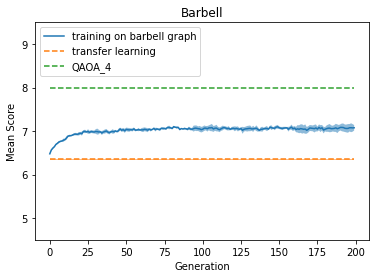

In [28]:
with open('BarbellTestMeanScore.csv') as barbell1: 
    energybarbell1 = barbell1.readline()

with open('BarbellTest1MeanScore.csv') as barbelltest1: 
    energybarbelltest1 = barbelltest1.readline()

with open('BarbellTest2MeanScore.csv') as barbelltest2: 
    energybarbelltest2 = barbelltest2.readline()

with open('BarbellTest3MeanScore.csv') as barbelltest3: 
    energybarbelltest3 = barbelltest3.readline()
    

barbelltl = []
for i in range(200):
    barbelltl.append(avg(sco_barbell))

barbellQAOA = []
for i in range(200):
    barbellQAOA.append(8.00)
    
avg_en1 = energybarbell1.split(',')
avg_en2 = energybarbelltest1.split(',')
avg_en3 = energybarbelltest2.split(',')
avg_en4 = energybarbelltest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLu = []
stdTLl = []

for i in range(200):
    temp1 = avg(sco_barbell) + np.std(sco_barbell)
    temp2 = avg(sco_barbell) - np.std(sco_barbell)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on barbell graph')
plt.plot(barbelltl, label='transfer learning', linestyle='--')
plt.plot(barbellQAOA, label='QAOA_4', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Barbell')
ax = plt.gca()
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
ax.set_ylim([4.5, 9.5])
plt.xlabel("Generation")
plt.ylabel("Mean Score")


plt.savefig('BMSTL.svg', format='svg', dpi = 1200)

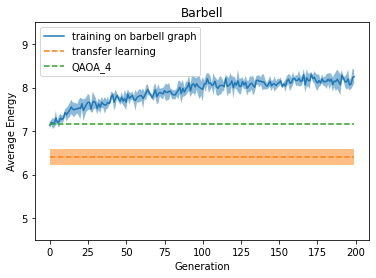

In [27]:
with open('BarbellTestAverageEnergy.csv') as barbell1: 
    energybarbell1 = barbell1.readline()

with open('BarbellTest1AverageEnergy.csv') as barbelltest1: 
    energybarbelltest1 = barbelltest1.readline()

with open('BarbellTest2AverageEnergy.csv') as barbelltest2: 
    energybarbelltest2 = barbelltest2.readline()

with open('BarbellTest3AverageEnergy.csv') as barbelltest3: 
    energybarbelltest3 = barbelltest3.readline()
    

barbelltl = []
for i in range(200):
    barbelltl.append(avg(avg_barbell))

barbellQAOA = []
for i in range(200):
    barbellQAOA.append(7.17)
    
avg_en1 = energybarbell1.split(',')
avg_en2 = energybarbelltest1.split(',')
avg_en3 = energybarbelltest2.split(',')
avg_en4 = energybarbelltest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLu = []
stdTLl = []

for i in range(200):
    temp1 = avg(avg_barbell) + np.std(avg_barbell)
    temp2 = avg(avg_barbell) - np.std(avg_barbell)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on barbell graph')
plt.plot(barbelltl, label='transfer learning', linestyle='--')
plt.plot(barbellQAOA, label='QAOA_4', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Barbell')
ax = plt.gca()
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
ax.set_ylim([4.5, 9.5])
plt.xlabel("Generation")
plt.ylabel("Average Energy")


plt.savefig('BAETL.svg', format='svg', dpi = 1200)

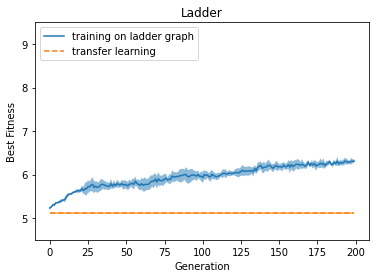

In [11]:
with open('LadderTestBestFitness.csv') as ladder1: 
    energyladder1 = ladder1.readline()

with open('LadderTest1BestFitness.csv') as laddertest1: 
    energyladdertest1 = laddertest1.readline()

with open('LadderTest2BestFitness.csv') as laddertest2: 
    energyladdertest2 = laddertest2.readline()

with open('LadderTest3BestFitness.csv') as laddertest3: 
    energyladdertest3 = laddertest3.readline()

laddertl = []
for i in range(200):
    laddertl.append(avg(fit_ladder))


avg_en1 = energyladder1.split(',')
avg_en2 = energyladdertest1.split(',')
avg_en3 = energyladdertest2.split(',')
avg_en4 = energyladdertest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(fit_ladder) + np.std(fit_ladder)
    temp2 = avg(fit_ladder) - np.std(fit_ladder)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on ladder graph')
plt.plot(laddertl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Ladder')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('LBFTL.svg', format='svg', dpi = 1200)

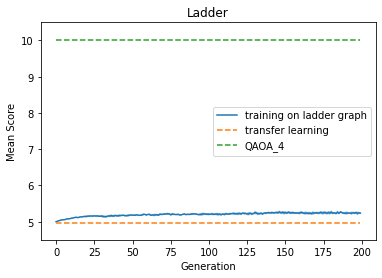

In [25]:
with open('LadderTestMeanScore.csv') as ladder1: 
    energyladder1 = ladder1.readline()

with open('LadderTest1MeanScore.csv') as laddertest1: 
    energyladdertest1 = laddertest1.readline()

with open('LadderTest2MeanScore.csv') as laddertest2: 
    energyladdertest2 = laddertest2.readline()

with open('LadderTest3MeanScore.csv') as laddertest3: 
    energyladdertest3 = laddertest3.readline()

laddertl = []
for i in range(200):
    laddertl.append(avg(sco_ladder))

ladderQAOA4 = []
for i in range(200):
    ladderQAOA4.append(10.00)    


avg_en1 = energyladder1.split(',')
avg_en2 = energyladdertest1.split(',')
avg_en3 = energyladdertest2.split(',')
avg_en4 = energyladdertest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(sco_ladder) + np.std(sco_ladder)
    temp2 = avg(sco_ladder) - np.std(sco_ladder)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on ladder graph')
plt.plot(laddertl, label='transfer learning', linestyle='--')
plt.plot(ladderQAOA4, label='QAOA_4', linestyle='--')
plt.legend(loc = 'center right')
plt.title('Ladder')
ax = plt.gca()
ax.set_ylim([4.5, 10.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Mean Score")

plt.savefig('LMSTL.svg', format='svg', dpi = 1200)

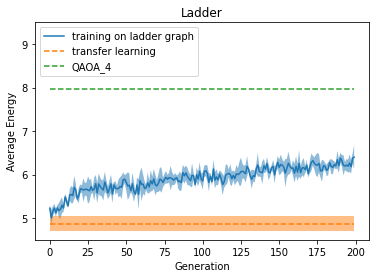

In [26]:
with open('LadderTestAverageEnergy.csv') as ladder1: 
    energyladder1 = ladder1.readline()

with open('LadderTest1AverageEnergy.csv') as laddertest1: 
    energyladdertest1 = laddertest1.readline()

with open('LadderTest2AverageEnergy.csv') as laddertest2: 
    energyladdertest2 = laddertest2.readline()

with open('LadderTest3AverageEnergy.csv') as laddertest3: 
    energyladdertest3 = laddertest3.readline()

laddertl = []
for i in range(200):
    laddertl.append(avg(avg_ladder))

ladderQAOA4 = []
for i in range(200):
    ladderQAOA4.append(7.97)

avg_en1 = energyladder1.split(',')
avg_en2 = energyladdertest1.split(',')
avg_en3 = energyladdertest2.split(',')
avg_en4 = energyladdertest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(avg_ladder) + np.std(avg_ladder)
    temp2 = avg(avg_ladder) - np.std(avg_ladder)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on ladder graph')
plt.plot(laddertl, label='transfer learning', linestyle='--')
plt.plot(ladderQAOA4, label='QAOA_4', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Ladder')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('LAETL.svg', format='svg', dpi = 1200)

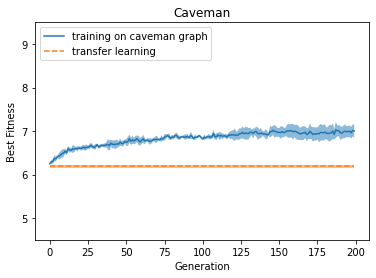

In [14]:
with open('CavemanTestBestFitness.csv') as caveman1: 
    energycaveman1 = caveman1.readline()

with open('CavemanTest1BestFitness.csv') as cavemantest1: 
    energycavemantest1 = cavemantest1.readline()

with open('CavemanTest2BestFitness.csv') as cavemantest2: 
    energycavemantest2 = cavemantest2.readline()

with open('CavemanTest3BestFitness.csv') as cavemantest3: 
    energycavemantest3 = cavemantest3.readline()

cavemantl = []
for i in range(200):
    cavemantl.append(avg(fit_caveman))

avg_en1 = energycaveman1.split(',')
avg_en2 = energycavemantest1.split(',')
avg_en3 = energycavemantest2.split(',')
avg_en4 = energycavemantest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(fit_caveman) + np.std(fit_caveman)
    temp2 = avg(fit_caveman) - np.std(fit_caveman)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on caveman graph')
plt.plot(cavemantl, label='transfer learning', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Caveman')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('CBFTL.svg', format='svg', dpi = 1200)

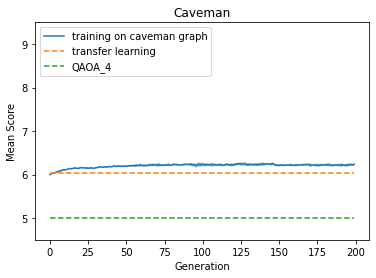

In [29]:
with open('CavemanTestMeanScore.csv') as caveman1: 
    energycaveman1 = caveman1.readline()

with open('CavemanTest1MeanScore.csv') as cavemantest1: 
    energycavemantest1 = cavemantest1.readline()

with open('CavemanTest2MeanScore.csv') as cavemantest2: 
    energycavemantest2 = cavemantest2.readline()

with open('CavemanTest3MeanScore.csv') as cavemantest3: 
    energycavemantest3 = cavemantest3.readline()

cavemantl = []
for i in range(200):
    cavemantl.append(avg(sco_caveman))

cavemanQAOA = []
for i in range(200):
    cavemanQAOA.append(5.00)

avg_en1 = energycaveman1.split(',')
avg_en2 = energycavemantest1.split(',')
avg_en3 = energycavemantest2.split(',')
avg_en4 = energycavemantest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(sco_caveman) + np.std(sco_caveman)
    temp2 = avg(sco_caveman) - np.std(sco_caveman)
    stdTLu.append(temp1)
    stdTLl.append(temp2)
    
plt.figure()

plt.plot(mean_value_energy, label='training on caveman graph')
plt.plot(cavemantl, label='transfer learning', linestyle='--')
plt.plot(cavemanQAOA, label='QAOA_4', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Caveman')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Mean Score")

plt.savefig('CMSTL.svg', format='svg', dpi = 1200)

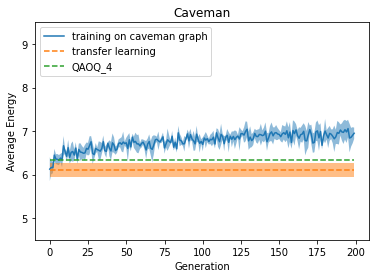

In [30]:
with open('CavemanTestAverageEnergy.csv') as caveman1: 
    energycaveman1 = caveman1.readline()

with open('Caveman1TestAverageEnergy.csv') as cavemantest1: 
    energycavemantest1 = cavemantest1.readline()

with open('Caveman2TestAverageEnergy.csv') as cavemantest2: 
    energycavemantest2 = cavemantest2.readline()

with open('Caveman3TestAverageEnergy.csv') as cavemantest3: 
    energycavemantest3 = cavemantest3.readline()

cavemantl = []
for i in range(200):
    cavemantl.append(avg(avg_caveman))

cavemanQAOA = []
for i in range(200):
    cavemanQAOA.append(6.34)

avg_en1 = energycaveman1.split(',')
avg_en2 = energycavemantest1.split(',')
avg_en3 = energycavemantest2.split(',')
avg_en4 = energycavemantest3.split(',')

res = []
res1 = []
res2 = []
res3 = []
t = np.arange(200)

for i in range(200):
    res.append(float((avg_en1[i])))

for i in range(200):
    res1.append(float((avg_en2[i])))

for i in range(200):
    res2.append(float((avg_en3[i])))

for i in range(200):
    res3.append(float((avg_en4[i])))

mean_value_energy = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i], res3[i]]) / 4
    mean_value_energy.append(temp)

stddev_values = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i], res3[i]])
    stddev_values.append(stddev)

stdupper = []
stdlower = []

for i in range(len(stddev_values)):
    temp1 = mean_value_energy[i] + stddev_values[i]
    temp2 = mean_value_energy[i] - stddev_values[i]
    stdupper.append(temp1)
    stdlower.append(temp2)

stdTLl = []
stdTLu = []

for i in range(200):
    temp1 = avg(avg_caveman) + np.std(avg_caveman)
    temp2 = avg(avg_caveman) - np.std(avg_caveman)
    stdTLu.append(temp1)
    stdTLl.append(temp2)

plt.figure()

plt.plot(mean_value_energy, label='training on caveman graph')
plt.plot(cavemantl, label='transfer learning', linestyle='--')
plt.plot(cavemanQAOA, label='QAOQ_4', linestyle='--')
plt.legend(loc = 'upper left')
plt.title('Caveman')
ax = plt.gca()
ax.set_ylim([4.5, 9.5])
ax.fill_between(t, stdupper, stdlower, alpha = 0.5)
ax.fill_between(t, stdTLu, stdTLl, alpha = 0.5)
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('CAETL.svg', format='svg', dpi = 1200)

### Vergleich von Original und Feature Map

In [84]:
with open('AverageEnergyOriginal.csv') as energyfile1: 
    energy1 = energyfile1.readline()

with open('AverageEnergyOriginal1.csv') as energyfile2: 
    energy2 = energyfile2.readline()
    
with open('AverageEnergyOriginal2.csv') as energyfile3: 
    energy3 = energyfile3.readline()
    
with open('AverageEnergyRZZ.csv') as energyfileRZZ1: 
    energyRZZ1 = energyfileRZZ1.readline()

with open('AverageEnergyRZZ1.csv') as energyfileRZZ2: 
    energyRZZ2 = energyfileRZZ2.readline()
    
with open('AverageEnergyRZZ2.csv') as energyfileRZZ3: 
    energyRZZ3 = energyfileRZZ3.readline()
    
avg_en1 = energy1.split(',')
avg_en2 = energy2.split(',')
avg_en3 = energy3.split(',')
avg_enRZZ1 = energyRZZ1.split(',')
avg_enRZZ2 = energyRZZ2.split(',')
avg_enRZZ3 = energyRZZ3.split(',')

res = []
res1 = []
res2 = []
res3 = []
res4 = []
res5 = []
t = np.arange(30)

# Original mutation power = .0001
for i in range(30):
    res.append(float((avg_en1[i])))

for i in range(30):
    res1.append(float((avg_en2[i])))

for i in range(30):
    res2.append(float(avg_en3[i]))

# RZZ mutation power = .0001
for i in range(30):
    res3.append(float((avg_enRZZ1[i])))

for i in range(30):
    res4.append(float((avg_enRZZ2[i])))

for i in range(30):
    res5.append(float(avg_enRZZ3[i]))

# Original mutation power = .01

resB = []
resB1 = []
resB2 = []
resB3 = []
resB4 = []
resB5 = []

# Original mutation power = .01
for i in range(120, 150):
    resB.append(float((avg_en1[i])))

for i in range(120, 150):
    resB1.append(float((avg_en2[i])))

for i in range(120, 150):
    resB2.append(float(avg_en3[i]))

# RZZ mutation power = .01
for i in range(120, 150):
    resB3.append(float((avg_enRZZ1[i])))

for i in range(120, 150):
    resB4.append(float((avg_enRZZ2[i])))

for i in range(120, 150):
    resB5.append(float(avg_enRZZ3[i]))

print(len(res))
## calculate average
# 0.0001 
mean_avg_en_original = []
for i in range(len(res)):
    temp = sum([res[i], res1[i], res2[i]]) / 3
    mean_avg_en_original.append(temp)

mean_avg_en_RZZ = []
for i in range(len(res3)):
    temp = sum([res3[i], res4[i], res5[i]]) / 3
    mean_avg_en_RZZ.append(temp)

std_avg_en_original = []
for i in range(len(res)):
    stddev = np.std([res[i], res1[i], res2[i]])
    std_avg_en_original.append(stddev)

std_avg_en_RZZ = []
for i in range(len(res3)):
    stddev = np.std([res3[i], res4[i], res5[i]])
    std_avg_en_RZZ.append(stddev)

# 0.01
mean_avg_en_original1 = []
for i in range(len(resB)):
    temp = sum([resB[i], resB1[i], resB2[i]]) / 3
    mean_avg_en_original1.append(temp)

mean_avg_en_RZZ1 = []
for i in range(len(resB3)):
    temp = sum([resB3[i], resB4[i], resB5[i]]) / 3
    mean_avg_en_RZZ1.append(temp)

std_avg_en_original1 = []
for i in range(len(resB)):
    stddev = np.std([resB[i], resB1[i], resB2[i]])
    std_avg_en_original1.append(stddev)

std_avg_en_RZZ1 = []
for i in range(len(resB3)):
    stddev = np.std([resB3[i], resB4[i], resB5[i]])
    std_avg_en_RZZ1.append(stddev)

stdorigupper = []
stdoriglower = []

for i in range(len(std_avg_en_original)):
    temp1 = mean_avg_en_original[i] + std_avg_en_original[i]
    temp2 = mean_avg_en_original[i] - std_avg_en_original[i]
    stdorigupper.append(temp1)
    stdoriglower.append(temp2)

stdRZZupper = []
stdRZZlower = []

for i in range(len(std_avg_en_RZZ)):
    temp1 = mean_avg_en_RZZ[i] + std_avg_en_RZZ[i]
    temp2 = mean_avg_en_RZZ[i] - std_avg_en_RZZ[i]
    stdRZZupper.append(temp1)
    stdRZZlower.append(temp2)

stdorigupper1 = []
stdoriglower1 = []

for i in range(len(std_avg_en_original1)):
    temp1 = mean_avg_en_original1[i] + std_avg_en_original1[i]
    temp2 = mean_avg_en_original1[i] - std_avg_en_original1[i]
    stdorigupper1.append(temp1)
    stdoriglower1.append(temp2)

stdRZZupper1 = []
stdRZZlower1 = []

for i in range(len(std_avg_en_RZZ1)):
    temp1 = mean_avg_en_RZZ1[i] + std_avg_en_RZZ1[i]
    temp2 = mean_avg_en_RZZ1[i] - std_avg_en_RZZ1[i]
    stdRZZupper1.append(temp1)
    stdRZZlower1.append(temp2)

plt.figure()

plt.plot(mean_avg_en_original, label='original, mut=.0001')
plt.plot(mean_avg_en_RZZ, label='RZZ, mut=.0001')
plt.plot(mean_avg_en_original1, label='original, mut=.01')
plt.plot(mean_avg_en_RZZ1, label='RZZ, mut=.01')
plt.legend(loc = 'upper left')
plt.title('Mean of Average Energies 3 runs')
ax = plt.gca()
ax.fill_between(t, stdorigupper, stdoriglower, alpha = 0.5)
ax.fill_between(t, stdRZZupper, stdRZZlower, alpha = 0.5)
ax.fill_between(t, stdorigupper1, stdoriglower1, alpha = 0.5)
ax.fill_between(t, stdRZZupper1, stdRZZlower1, alpha = 0.5)
ax.set_ylim([7.5, 10.5])
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('MeanAvEnergyTest.svg', format='svg', dpi = 1200)

FileNotFoundError: [Errno 2] No such file or directory: 'AverageEnergyOriginal.csv'

In [ ]:
with open('BestFitnessOriginal.csv') as fitnessfile1: 
    fitness1 = fitnessfile1.readline()

with open('BestFitnessOriginal1.csv') as fitnessfile2: 
    fitness2 = fitnessfile2.readline()
    
with open('BestFitnessOriginal2.csv') as fitnessfile3: 
    fitness3 = fitnessfile3.readline()
    
with open('BestFitnessRZZ.csv') as fitnessfileRZZ1: 
    fitnessRZZ1 = fitnessfileRZZ1.readline()

with open('BestfitnessRZZ1.csv') as fitnessfileRZZ2: 
    fitnessRZZ2 = fitnessfileRZZ2.readline()
    
with open('BestFitnessRZZ2.csv') as fitnessfileRZZ3: 
    fitnessRZZ3 = fitnessfileRZZ3.readline()
    
avg_fi1 = fitness1.split(',')
avg_fi2 = fitness2.split(',')
avg_fi3 = fitness3.split(',')
avg_fiRZZ1 = fitnessRZZ1.split(',')
avg_fiRZZ2 = fitnessRZZ2.split(',')
avg_fiRZZ3 = fitnessRZZ3.split(',')

fitres = []
fitres1 = []
fitres2 = []
fitres3 = []
fitres4 = []
fitres5 = []

# Original mutation power = .0001
for i in range(30):
    fitres.append(float((avg_fi1[i])))

for i in range(30):
    fitres1.append(float((avg_fi2[i])))

for i in range(30):
    fitres2.append(float(avg_fi3[i]))

# RZZ mutation power = .0001
for i in range(30):
    fitres3.append(float((avg_fiRZZ1[i])))

for i in range(30):
    fitres4.append(float((avg_fiRZZ2[i])))

for i in range(30):
    fitres5.append(float(avg_fiRZZ3[i]))

# Original mutation power = .01

fitresB = []
fitresB1 = []
fitresB2 = []
fitresB3 = []
fitresB4 = []
fitresB5 = []

# Original mutation power = .01
for i in range(121, 150):
    fitresB.append(float((avg_fi1[i])))

for i in range(121, 150):
    fitresB1.append(float((avg_fi2[i])))

for i in range(121, 150):
    fitresB2.append(float(avg_fi3[i]))

# RZZ mutation power = .01
for i in range(121, 150):
    fitresB3.append(float((avg_fiRZZ1[i])))

for i in range(121, 150):
    fitresB4.append(float((avg_fiRZZ2[i])))

for i in range(121, 150):
    fitresB5.append(float(avg_fiRZZ3[i]))


## calculate average
# 0.0001 
mean_avg_fi_original = []
for i in range(len(fitres)):
    temp = sum([fitres[i], fitres1[i], fitres2[i]]) / 3
    mean_avg_fi_original.append(temp)

mean_avg_fi_RZZ = []
for i in range(len(fitres3)):
    temp = sum([fitres3[i], fitres4[i], fitres5[i]]) / 3
    mean_avg_fi_RZZ.append(temp)

# 0.01
mean_avg_fi_original1 = []
for i in range(len(fitresB)):
    temp = sum([fitresB[i], fitresB1[i], fitresB2[i]]) / 3
    mean_avg_fi_original1.append(temp)

mean_avg_fi_RZZ1 = []
for i in range(len(fitresB3)):
    temp = sum([fitresB3[i], fitresB4[i], fitresB5[i]]) / 3
    mean_avg_fi_RZZ1.append(temp)

features = [i for i in range(1,7)]
plt.figure()

plt.plot(mean_avg_fi_original, label='original, mut=.0001')
plt.plot(mean_avg_fi_RZZ, label='RZZ, mut=.0001')
plt.plot(mean_avg_fi_original1, label='original, mut=.01')
plt.plot(mean_avg_fi_RZZ1, label='RZZ, mut=.01')
plt.legend()
plt.title('Mean of Best Fitness 3 runs')
ax = plt.gca()
ax.set_ylim([7.5, 10.5])
plt.xlabel("Generation")
plt.ylabel("Best Fitness")

plt.savefig('MeanBestFitness30g.svg', format='svg', dpi = 1200)

FileNotFoundError: [Errno 2] No such file or directory: 'BestFitnessOriginal2.csv'

In [ ]:
with open('AverageEnergy.csv') as energyfile: 
    energy = energyfile.readline()

with open('BestFitnessTest.csv') as fitnessfile:
    fitness = fitnessfile.readline()

mean_scores = energy.split(',')
best_agent_fitness = fitness.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
for i in range(10):
    res.append(float((mean_scores[i])))

for i in range(20, 30):
    res1.append(float((mean_scores[i])))

for i in range(100,110):
    res5.append(float(mean_scores[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='a=false, mut=0.0001')
plt.plot(res1, label='a=flase, mut=0.001')
plt.plot(res5, label='a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([7.5, 9.5])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Average Energy")

plt.savefig('AverageEnergyOrigin.svg', format='svg', dpi = 1200)
#Gen1FalseMu0.0001run1

#mean scores
#plt.plot(generations, mean_scores[0:9], label='a=false, mut=0.0001')
#plt.plot(generations, mean_scores[20:29], label='a=false, mut=0.001')
#plt.plot(generations, mean_scores[40:49], label='a=false, mut=0.01')
#plt.plot(generations, mean_scores[60:69], label='a=0.3, mut=0.0001')
#plt.plot(generations, mean_scores[80:89], label='a=0.3, mut=0.001')
#plt.plot(generations, mean_scores[100:109], label='a=0.3, mut=0.01')
#plt.title("100 agents, 10 generations")
#plt.xlabel("generation")
#plt.ylabel("mean scores")
#plt.legend()

#plt.show()
#plt.savefig('mean_scores_100agents_10generations.png')


FileNotFoundError: [Errno 2] No such file or directory: 'AverageEnergy.csv'

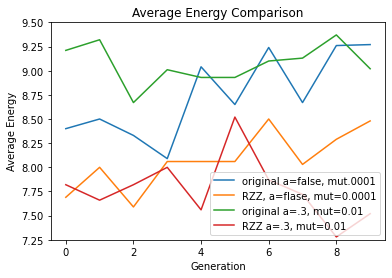

In [ ]:
with open('AverageEnergyOrigin.csv') as origin: 
    origin = origin.readline()

with open('AverageEnergyRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([7.25, 9.5])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Average Energy")
plt.title('Average Energy Comparison')

plt.savefig('CompareEnergy.svg', format='svg', dpi = 1200)

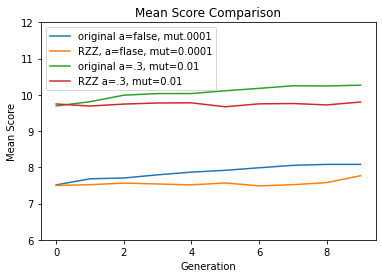

In [ ]:
with open('MeanScoreOrigin.csv') as origin: 
    origin = origin.readline()

with open('MeanScoreRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([6, 12])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Mean Score")
plt.title('Mean Score Comparison')

plt.savefig('CompareMean.svg', format='svg', dpi = 1200)

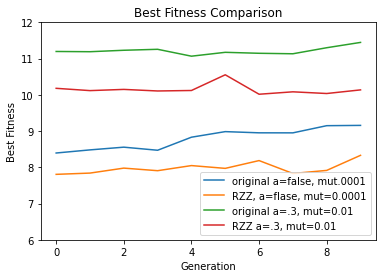

In [ ]:
with open('BestFitnessOrigin.csv') as origin: 
    origin = origin.readline()

with open('BestFitnessRZZ.csv') as energyfile:
    energy = energyfile.readline()

original_scores = origin.split(',')
energy_mean = energy.split(',')
#generations = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
res = []
res1 = []
res5 = []
res4 = []
for i in range(10):
    res.append(float((original_scores[i])))

for i in range(10):
    res1.append(float((energy_mean[i])))

for i in range(100,110):
    res5.append(float(original_scores[i]))

for i in range(100,110):
    res4.append(float(energy_mean[i]))


features = [i for i in range(1,7)]
plt.figure()

plt.plot(res, label='original a=false, mut.0001')
plt.plot(res1, label='RZZ, a=flase, mut=0.0001')
plt.plot(res5, label='original a=.3, mut=0.01')
plt.plot(res4, label='RZZ a=.3, mut=0.01')
plt.legend()

ax = plt.gca()
ax.set_ylim([6, 12])
#plt.title("Rigetti - Calibration Run [20.07.2022]")
plt.xlabel("Generation")
plt.ylabel("Best Fitness")
plt.title('Best Fitness Comparison')

plt.savefig('CompareBestFitness.svg', format='svg', dpi = 1200)